Data Scrapped from times of india and the hindu

Using GeoCoding Found the Lat and Long of the cities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import os
os.chdir('/home/manobhav/PycharmProjects/demonetisation analysis')
ndata=pd.read_csv('Data/demonetlatlong.csv')
ndata.head()

,Date,Heading,Article,Category,Paper,Link,City,Lat,Long,State,Sentiment
0,2016-11-09 06:32:00,Currency demonetisation: RBI got 6 months to p...,"NEW DELHI: Around six months ago, the governme...",business,toi,http://timesofindia.indiatimes.com//business/i...,NaN,NaN,NaN,NaN,1
1,2016-11-09 13:25:00,Demonetisation move to create corruption-free ...,NEW DELHI: The decision to scrap Rs 500 and Rs...,india,toi,http://timesofindia.indiatimes.com//india/Demo...,NaN,NaN,NaN,NaN,1
2,2016-11-09 11:14:00,Demonetisation leads to chaos on Delhi-Gurgaon...,GURUGRAM: The ban on Rs 500 and Rs 1000 curren...,city,toi,http://timesofindia.indiatimes.com//city/gurga...,gurgaon,28.459497,77.026638,Haryana,-1
3,2016-11-10 12:28:00,Currency demonetization puts odds against casinos,PANAJI: Fortunes of the five offshore casino o...,city,toi,http://timesofindia.indiatimes.com//city/goa/C...,goa,15.299327,74.123996,Goa,-1
4,2017-01-24 12:52:00,Kannada film shoots stalled because of demonet...,The currency demonetization came as a surprise...,entertainment,toi,http://timesofindia.indiatimes.com//entertainm...,NaN,NaN,NaN,NaN,-1


In [41]:
def func(x):
    if x.Category in ['Karnataka','Kerala','Tamil Nadu','Telangana','Other States','Delhi','Hyderabad','Kochi','Vijayawada',\
                        'Kozhikode','Bengaluru','Andhra Pradesh','Thiruvananthapuram','Puducherry','Visakhapatnam','Madurai',\
                        'Chennai','Mumbai','Coimbatore','Kolkata','Mangaluru','Metroplus','Tiruchirapalli','States']:
        x.Category='City'
    if x.City!=np.nan:
        x.City=str(x.City).lower().replace(' ','').replace(',','').replace('-','')
    return x  
ndata=ndata.apply(func,axis=1)

In [57]:
temp=pd.crosstab(ndata['Category'],ndata['Sentiment']).apply(lambda r:r/r.sum(),axis=1)
temp

Sentiment,-1,1
Category,,
Business,0.608696,0.391304
City,0.832512,0.167488
Columns,1.000000,0.000000
Comment,0.000000,1.000000
Economy,0.486486,0.513514
Editorial,0.500000,0.500000
Education,0.000000,1.000000
Industry,0.909091,0.090909
International,0.545455,0.454545


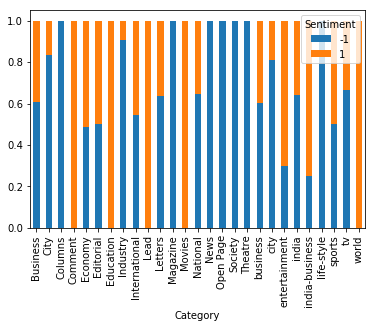

In [58]:
temp.plot(kind='bar',stacked=True)

In [56]:
k=pd.DataFrame(temp.idxmax(axis=0))
str(k.loc[-1][0])

'agartala'

In [55]:
from mpl_toolkits.basemap import Basemap
m=Basemap(projection='mill',llcrnrlat=ndata.lat.min()-2,urcrnrlat=ndata.lat.max()+2,llcrnrlon=ndata.long.min()-2,urcrnrlon=ndata.long.max()+2,resolution='c',epsg=4269)
x,y=m(tuple(ndata.long[(ndata.long.isnull()==False)]),tuple(ndata.lat[(ndata.lat.isnull()==False)]))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=70.5713621,6.524139099999999,95.60531630000001,32.7333148&bboxSR=4269&imageSR=4269&size=400,418&dpi=96&format=png32&f=image


/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


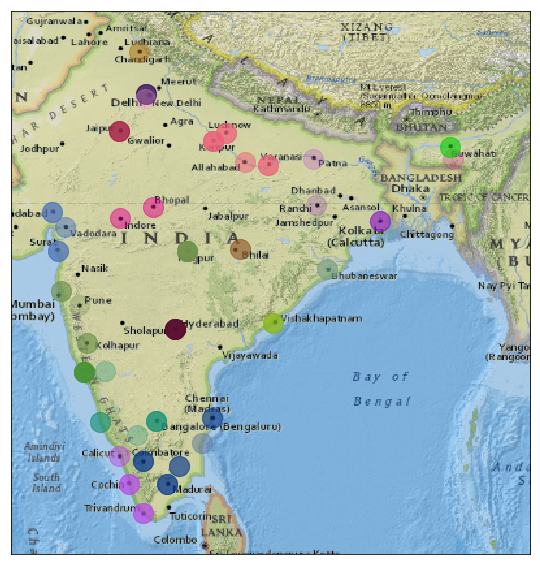

In [12]:
color = np.random.rand(ndata.state[(ndata.long.isnull()==False)].unique().shape[0], 3)
plt.figure(figsize=(20,10))
m1=Basemap(projection='mill',llcrnrlat=ndata.lat.min()-2,urcrnrlat=ndata.lat.max()+2,llcrnrlon=ndata.long.min()-2,urcrnrlon=ndata.long.max()+2,resolution='c',epsg=4269)
m1.arcgisimage(service="NatGeo_World_Map", verbose=True)
c = 0
for i in ndata.state[(ndata.long.isnull()==False)].unique():
    x1, y1 = m(tuple(ndata.long[(ndata.long.isnull()==False) & (ndata.state == i)]), \
         tuple(ndata.lat[(ndata.lat.isnull() == False) & (ndata.state == i)]))
    m1.plot(x1,y1,'ro',markersize=20,alpha=0.3, color = color[c] )
    c += 1
